# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

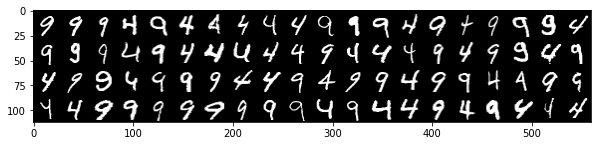

In [10]:
show_digit(X)

In [5]:
# Do feature normalization here
# begin answer
print(X)
X = (X-np.mean(X, axis=0)) / np.std(X, axis=0)  # normalize 
# end answer

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Ridge Regression and LOOCV

In [7]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')


from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)
        w = ridge(X_, y_, lmbdas[i])
        # E_val += (w.T.dot(np.vstack((np.ones((1, 1)), X[:,j].reshape(-1, 1)))) - y[:,j])**2
        pred = w.T.dot(np.vstack((np.ones((1, 1)), X[:,j].reshape(-1, 1))))
        
        if ((pred > 0) * 2 - 1 != y[:,j]):
            E_val += 1

    # Update lmbda according validation error
    # begin answer
    if E_val <= E_val_min:
        E_val_min = E_val 
        lmbda = lmbdas[i]
    print('λ = {} done. train error = {:.4f}%'.format(lmbdas[i], E_val/X.shape[1]*100))
    # end answer
    
# Compute training error
print('The best λ =',lmbda)
E_train = E_val_min / X.shape[1]
print('E_train = {:.4f}%'.format(E_train*100))
# Do feature normalization to X_test, y_test
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
w_test = ridge(X, y, lmbda)
# ...
# Compute test error
error_test = (((w_test.T.dot(np.vstack((np.ones((1, X_test.shape[1])), X_test))) > 0) * 2 - 1) != y_test).sum()
E_test = error_test / X_test.shape[1]
print('E_test = {:.4f}%'.format(E_test*100))

λ = 0.001 done. train error = 6.0000%
λ = 0.01 done. train error = 6.0000%
λ = 0.1 done. train error = 6.0000%
λ = 0.0 done. train error = 6.0000%
λ = 1.0 done. train error = 5.5000%
λ = 10.0 done. train error = 5.0000%
λ = 100.0 done. train error = 4.0000%
λ = 1000.0 done. train error = 4.0000%
The best λ = 1000.0
E_train = 4.0000%
E_test = 5.9267%


In [8]:
w_reg = ridge(X, y, lmbda)
w_noreg = ridge(X, y, 0)
print('w2 with best λ = {:.4f}'.format((w_reg**2).sum()))
print('w2 without regularization = {:.4f}'.format((w_noreg**2).sum()))

w_test = ridge(X, y, 0)
# ...
# Compute test error
error_test = (((w_test.T.dot(np.vstack((np.ones((1, X_test.shape[1])), X_test))) > 0) * 2 - 1) != y_test).sum()
E_test = error_test / X_test.shape[1]
print('E_test = {:.4f}%'.format(E_test*100))

w2 with best λ = 0.0298
w2 without regularization = 0.8918
E_test = 9.0407%


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [50]:
from logistic_r import logistic_r
# lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0.001
# E_val_min = float('inf')

# for i in range(len(lmbdas)):
#     E_val = 0
#     error_train = 0
#     for j in range(X.shape[1]):
#         X_ = np.delete(X, j, axis=1)  # take point j out of X
#         y_ = np.delete(y, j, axis=1)
#         w = logistic_r(X_, y_, lmbdas[i])
#         pred = w.T.dot(np.vstack((np.ones((1, 1)), X[:,j].reshape(-1, 1))))
#         pred = 1 / (1 + np.exp(-pred))  # change to possibility 
#         if ((pred > 0.5) * 2 - 1 != y[:,j]):
#             E_val += 1
#     # Update lmbda according validation error
#     # begin answer

#     if E_val <= E_val_min:
#         E_val_min = E_val
#         lmbda = lmbdas[i]
#     print('λ = {} done. train error = {:.4f}%'.format(lmbdas[i], E_val/X.shape[1]*100))
#     # end answer
    
# # Compute training error
# print('The best λ =',lmbda)
# E_train = E_val_min / X.shape[1]
# print('E_train = {:.4f}%'.format(E_train*100))

# Compute test error
w_test = logistic_r(X, y, lmbda)
pred_y = w_test.T.dot(np.vstack((np.ones((1, X.shape[1])), X)))
pred_y = 1 / (1 + np.exp(-pred_y))
error_test = (((pred_y > 0.5) * 2 - 1) != y).astype(int).sum()
E_test = error_test / X.shape[1]
print('λ = {}, E_test = {:.4f}%'.format(lmbda, E_test*100))

pred_y = w_test.T.dot(np.vstack((np.ones((1, X_test.shape[1])), X_test)))
pred_y = 1 / (1 + np.exp(-pred_y))
error_test = (((pred_y > 0.5) * 2 - 1) != y_test).astype(int).sum()
E_test = error_test / X_test.shape[1]
print('λ = {}, E_test = {:.4f}%'.format(lmbda, E_test*100))

w_test_0 = logistic_r(X, y, 0.1)
pred_y_0 = w_test_0.T.dot(np.vstack((np.ones((1, X_test.shape[1])), X_test)))
pred_y_0 = 1 / (1 + np.exp(-pred_y_0))
error_test_0 = (((pred_y_0 > 0.5) * 2 - 1) != y_test).astype(int).sum()
E_test_0 = error_test_0 / X_test.shape[1]
print('λ = 0， E_test = {:.4f}% (No Regularization.)'.format(E_test_0*100))

λ = 0.001, E_test = 0.0000%
λ = 0.001, E_test = 5.2737%
λ = 0， E_test = 5.1231% (No Regularization.)
